In [1]:
# Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import datetime
import math
import sklearn
import statsmodels.tsa.stattools as sts
import statsmodels.api as sm
!pip install prophet
import matplotlib.dates as mdates

In [2]:
#Importing the data from the excel sheet
CraftBeer = pd.read_excel('7B21E009.xlsx', sheet_name = 'CraftBeer', parse_dates={'Date': ["Year","Month"]})
Whiskey = pd.read_excel('7B21E009.xlsx', sheet_name ='Whiskey', parse_dates={'Date': ["Year","Month"]})
WhiteWine = pd.read_excel('7B21E009.xlsx', sheet_name = 'WhiteWine',parse_dates={'Date': ["Year","Month"]})

In [3]:
# Merging the data
df5 = pd.merge(CraftBeer, Whiskey, on=['Date'])
df5

,Date,Relative Interest_x,Relative Interest_y
0,2010-01-01,6,41
1,2010-02-01,9,42
2,2010-03-01,15,44
3,2010-04-01,12,41
4,2010-05-01,17,39
...,...,...,...
67,2015-08-01,84,69
68,2015-09-01,75,63
69,2015-10-01,66,65
70,2015-11-01,66,87


In [4]:
# Merging the data
df = pd.merge(WhiteWine, df5, on=['Date'])
df

,Date,Relative Interest,Relative Interest_x,Relative Interest_y
0,2010-01-01,54,6,41
1,2010-02-01,54,9,42
2,2010-03-01,58,15,44
3,2010-04-01,52,12,41
4,2010-05-01,61,17,39
...,...,...,...,...
67,2015-08-01,81,84,69
68,2015-09-01,72,75,63
69,2015-10-01,70,66,65
70,2015-11-01,83,66,87


In [5]:
# Renaming the Coloumn
df = df.rename(columns={'Relative Interest': 'WhiteWine_RI', 'Relative Interest_x': 'CraftBeer_RI', 'Relative Interest_y': 'Whiskey_RI' })
df

,Date,WhiteWine_RI,CraftBeer_RI,Whiskey_RI
0,2010-01-01,54,6,41
1,2010-02-01,54,9,42
2,2010-03-01,58,15,44
3,2010-04-01,52,12,41
4,2010-05-01,61,17,39
...,...,...,...,...
67,2015-08-01,81,84,69
68,2015-09-01,72,75,63
69,2015-10-01,70,66,65
70,2015-11-01,83,66,87


In [6]:
# Checking on descriptive stastistics of the dataset 
df.describe()

,WhiteWine_RI,CraftBeer_RI,Whiskey_RI
count,72.000000,72.000000,72.000000
mean,72.694444,43.722222,60.430556
std,9.181486,24.405161,13.787958
min,50.000000,6.000000,36.000000
25%,67.000000,22.000000,51.750000
50%,73.000000,43.000000,60.500000
75%,79.000000,66.000000,67.000000
max,100.000000,100.000000,100.000000


In [7]:
# Checking datatype of the dataset 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72 entries, 0 to 71
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          72 non-null     datetime64[ns]
 1   WhiteWine_RI  72 non-null     int64         
 2   CraftBeer_RI  72 non-null     int64         
 3   Whiskey_RI    72 non-null     int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 2.8 KB


In [8]:
# Indexing the date coloumn
df.set_index("Date", inplace=True)

In [9]:
# Checking of the data
df.head()

,WhiteWine_RI,CraftBeer_RI,Whiskey_RI
Date,,,
2010-01-01,54,6,41
2010-02-01,54,9,42
2010-03-01,58,15,44
2010-04-01,52,12,41
2010-05-01,61,17,39


In [10]:
# Checking for the null values in the data
df.isna().sum()

WhiteWine_RI    0
CraftBeer_RI    0
Whiskey_RI      0
dtype: int64

# Exploratory Data Analysis

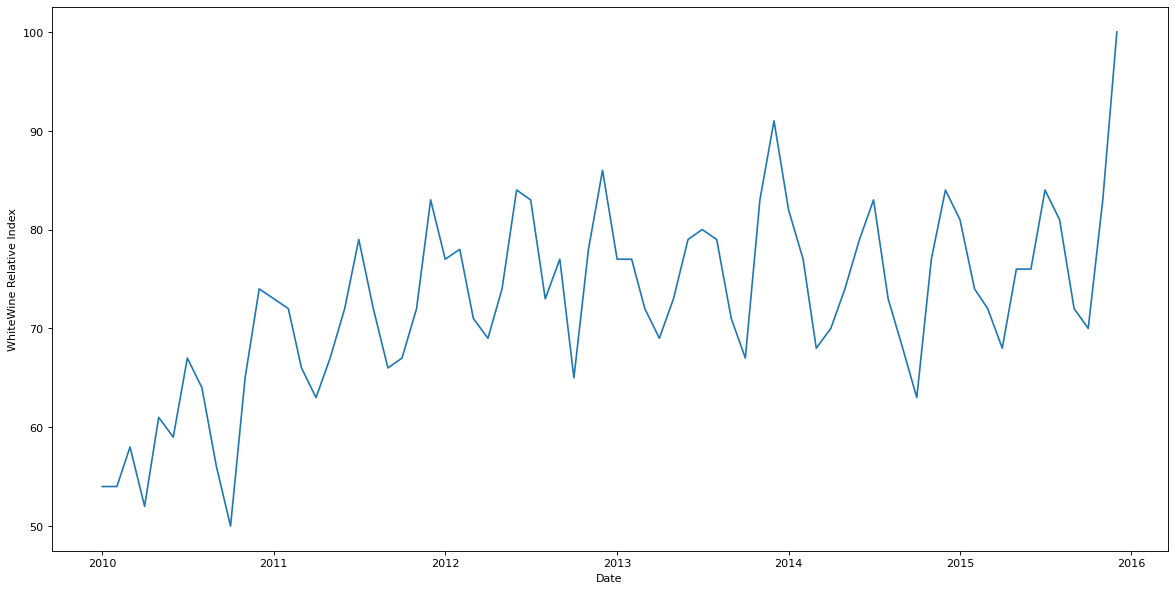

In [11]:
# plotting the graph for Relative Index of White Wine  over years
figure(figsize=(18,9), dpi=80)
plt.xlabel("Date")
plt.ylabel("WhiteWine Relative Index")
plt.plot(df.WhiteWine_RI)

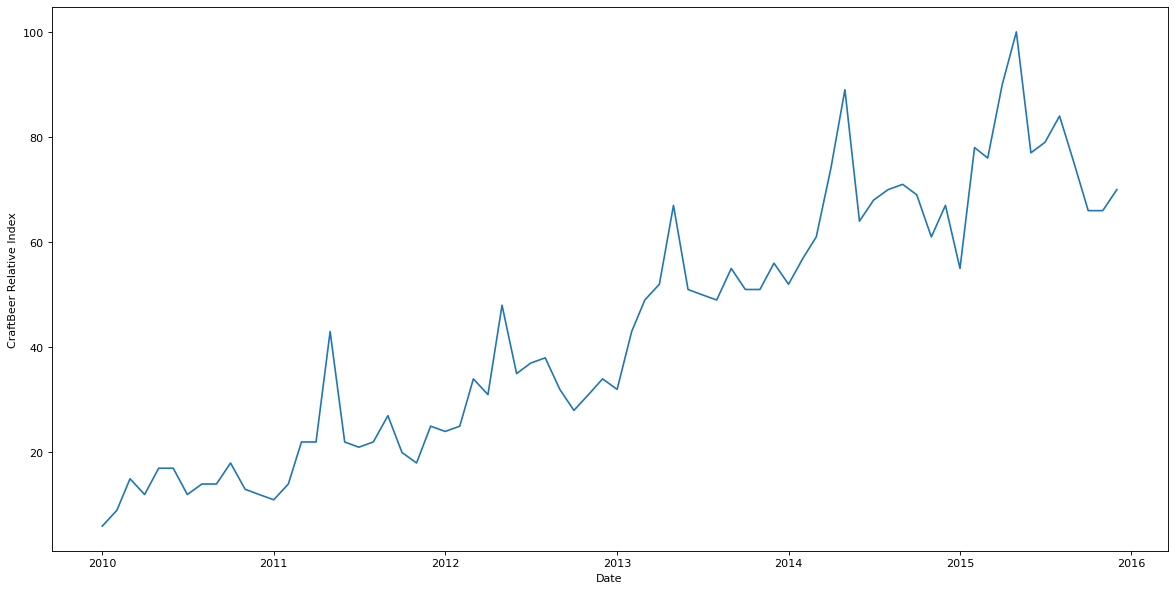

In [12]:
# plotting the graph for Relative Index of Craft Beer over years
figure(figsize=(18,9), dpi=80)
plt.xlabel("Date")
plt.ylabel("CraftBeer Relative Index")
plt.plot(df.CraftBeer_RI)


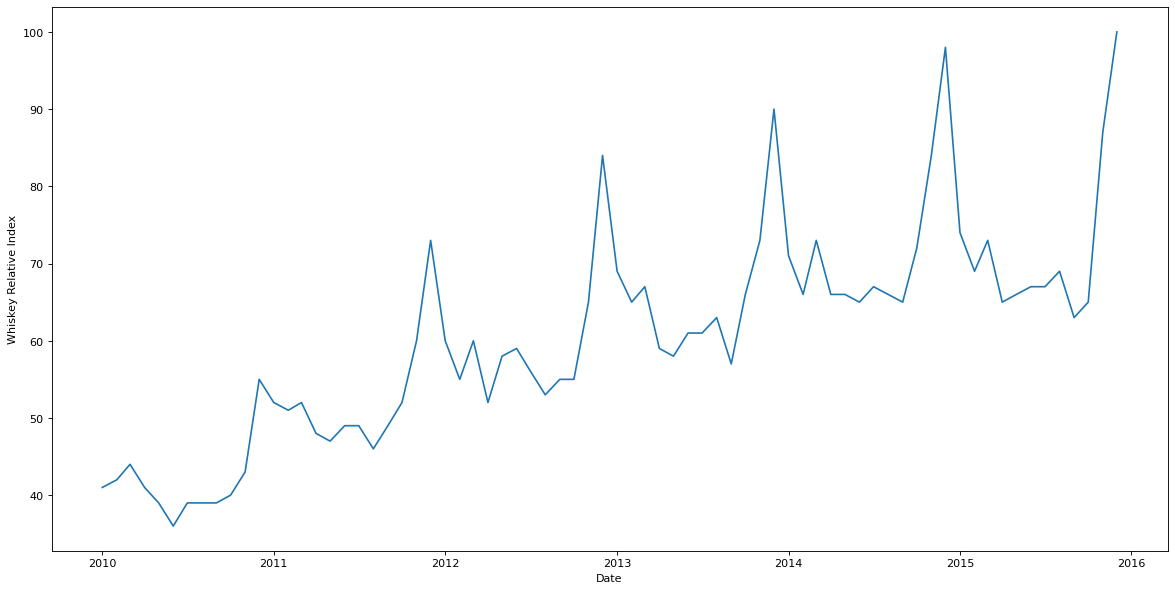

In [13]:
# plotting the graph for Relative Index of Whiskey over years
figure(figsize=(18,9), dpi=80)
plt.xlabel("Date")
plt.ylabel("Whiskey Relative Index")
plt.plot(df.Whiskey_RI)

# Whiskey

<AxesSubplot:xlabel='Date'>

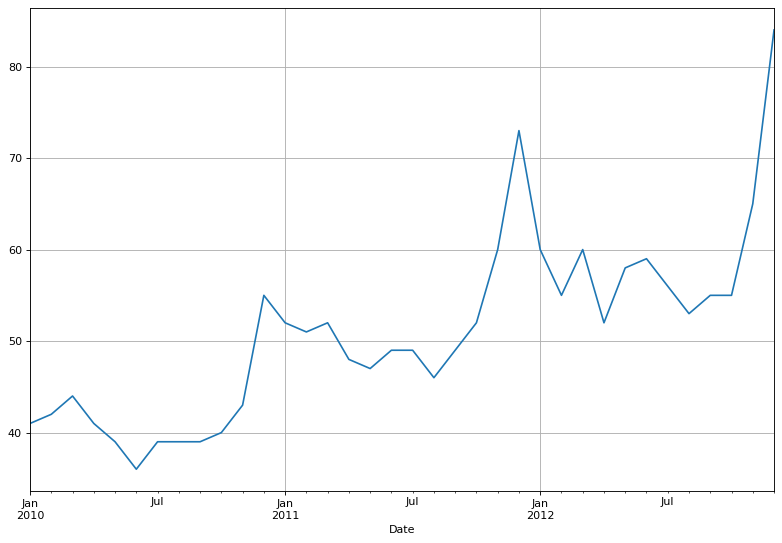

In [14]:
# plotting the graph for Relative Index of Whiskey over years (Checking the Trend Month on Month)
from datetime import datetime
figure(figsize=(12,8), dpi=80)
start_date = datetime(2010,1,1)
end_date = datetime(2012,12,1)

df.Whiskey_RI[(start_date <= df.Whiskey_RI.index) & (df.Whiskey_RI.index <= end_date)].plot(grid='on')

# No Clear pattern is Visible in the whiskey over the years, the RI of Whiskey increases toward the end of the year.

<AxesSubplot:xlabel='Date'>

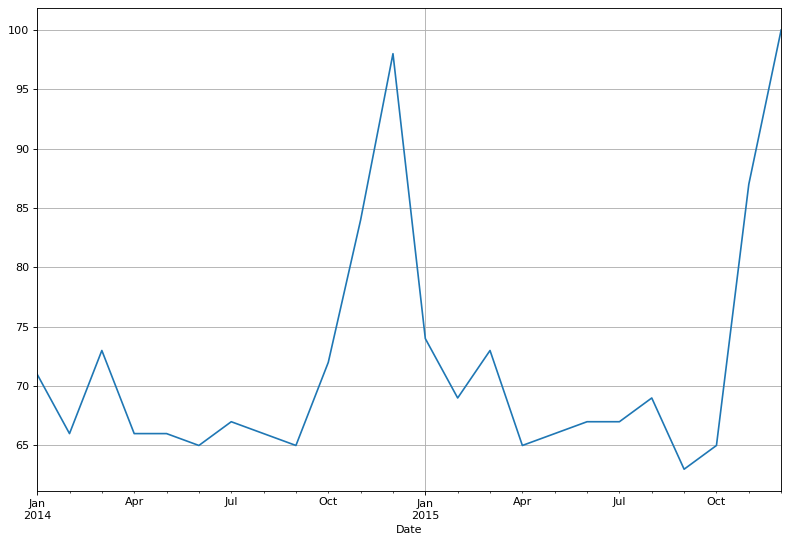

In [15]:
# plotting the graph for Relative Index of Whiskey over years (Checking the Trend Month on Month)
figure(figsize=(12,8), dpi=80)
start_date = datetime(2014,1,1)
end_date = datetime(2015,12,1)

df.Whiskey_RI[(start_date <= df.Whiskey_RI.index) & (df.Whiskey_RI.index <= end_date)].plot(grid='on')

# The RI increases toward the last quarter of the Year.

In [16]:
# Determining Rolling Statistics for Whiskey
rollmean_w = df.Whiskey_RI.rolling(window=12).mean()
rollstd_w = df.Whiskey_RI.rolling(window=12).std()
print(rollmean_w, rollstd_w)

Date
2010-01-01          NaN
2010-02-01          NaN
2010-03-01          NaN
2010-04-01          NaN
2010-05-01          NaN
                ...    
2015-08-01    72.416667
2015-09-01    72.250000
2015-10-01    71.666667
2015-11-01    71.916667
2015-12-01    72.083333
Name: Whiskey_RI, Length: 72, dtype: float64 Date
2010-01-01          NaN
2010-02-01          NaN
2010-03-01          NaN
2010-04-01          NaN
2010-05-01          NaN
                ...    
2015-08-01     9.652681
2015-09-01     9.808392
2015-10-01    10.030257
2015-11-01    10.396313
2015-12-01    10.858246
Name: Whiskey_RI, Length: 72, dtype: float64


Text(0.5, 1.0, 'Rolling Mean & Standard Deviation - Whiskey')

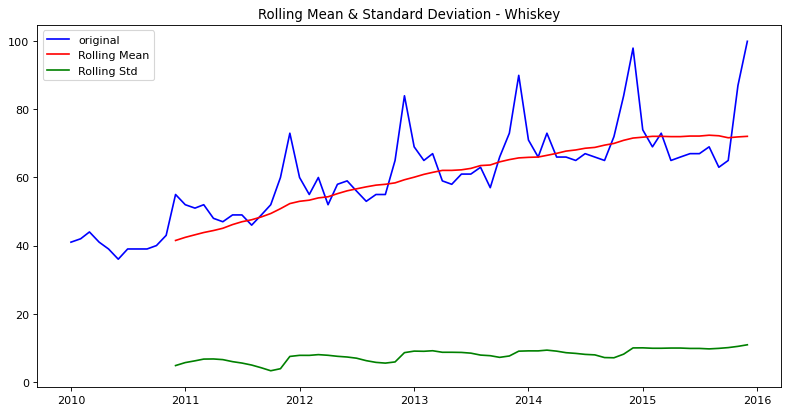

In [17]:
# Plotting the Graph for Rolling Statistics of Whiskey to check if the data is stationary for Whiskey 
figure(figsize=(12,6), dpi=80)
orig =plt.plot(df.Whiskey_RI, color ='b',label = 'original')
mean =plt.plot(rollmean_w, color ='r', label = 'Rolling Mean')
mean =plt.plot(rollstd_w, color ='g', label = 'Rolling Std')
plt.legend(loc="best")
plt.title('Rolling Mean & Standard Deviation - Whiskey')

In [18]:
#Performing Dicky-Fuller Test in order to check if the data is stationary for Whiskey
print('Result of Dickey-Fuller Test:')
dfoutput_2 = sts.adfuller(df.Whiskey_RI)
df_w = pd.Series(dfoutput_2[0:4], index=['Test Statistics','p-value','# Lags used', '# Observation used'])
for key, value in dfoutput_2[4].items():
    df_w['Critical Value (%s)' %key] = value
print(df_w)

# The ADF tests gives the following results – test statistic, p-value and the critical value at 1%, 5% , and 10% confidence intervals.
# The p-value is obtained is less than significance level of 0.05
# The time-series is stationary. (We can accept the null hypothesis) 

Result of Dickey-Fuller Test:
Test Statistics         -2.991639
p-value                  0.035683
# Lags used             12.000000
# Observation used      59.000000
Critical Value (1%)     -3.546395
Critical Value (5%)     -2.911939
Critical Value (10%)    -2.593652
dtype: float64


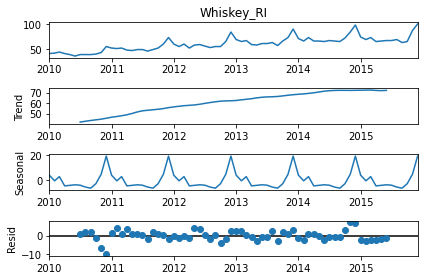

In [19]:
decomposition = sm.tsa.seasonal_decompose(df.Whiskey_RI, model='additive')
fig = decomposition.plot()

# White Wine

<AxesSubplot:xlabel='Date'>

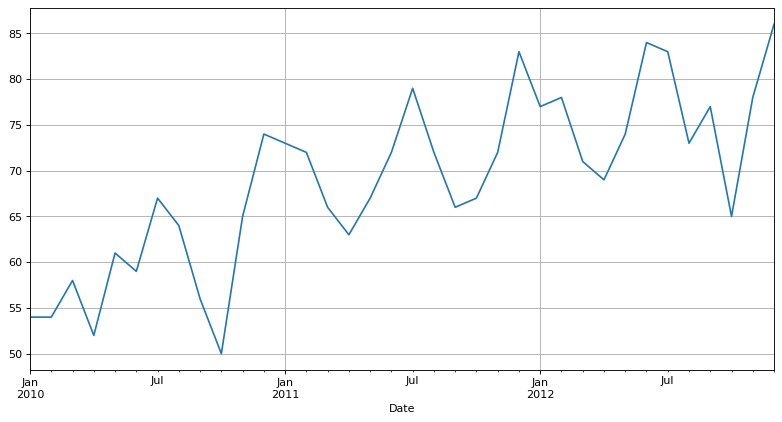

In [20]:
# plotting the graph for Relative Index of White Wine over years (Checking the Trend Month on Month)
figure(figsize=(12,6), dpi=80)
start_date = datetime(2010,1,1)
end_date = datetime(2012,12,1)

df.WhiteWine_RI[(start_date <= df.WhiteWine_RI.index) & (df.WhiteWine_RI.index <= end_date)].plot(grid='on')

# The RI of White Wine is more from April - July & last quarter of the Year.

<AxesSubplot:xlabel='Date'>

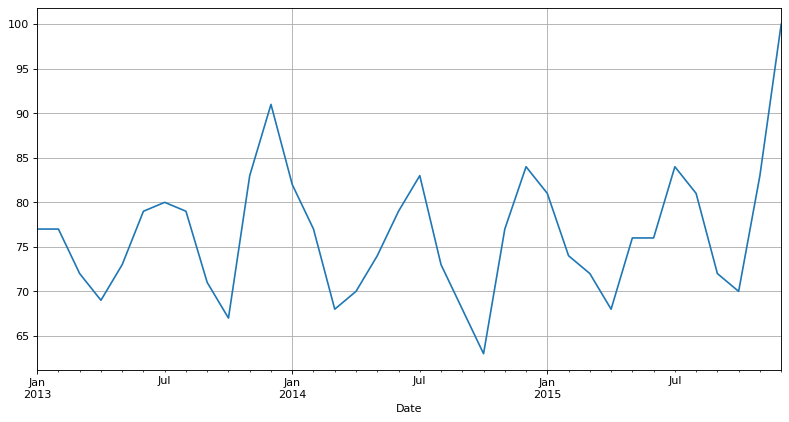

In [21]:
# plotting the graph for Relative Index of White Wine over years (Checking the Trend Month on Month)
figure(figsize=(12,6), dpi=80)
start_date = datetime(2013,1,1)
end_date = datetime(2015,12,1)

df.WhiteWine_RI[(start_date <= df.WhiteWine_RI.index) & (df.WhiteWine_RI.index <= end_date)].plot(grid='on')

# The RI of White Wine is more from April - July & last quarter of the Year.

In [22]:
# Determining Rolling Statistics for WhiteWine
rollmean_ww = df.WhiteWine_RI.rolling(window=12).mean()
rollstd_ww = df.WhiteWine_RI.rolling(window=12).std()
print(rollmean_ww, rollstd_ww)

Date
2010-01-01          NaN
2010-02-01          NaN
2010-03-01          NaN
2010-04-01          NaN
2010-05-01          NaN
                ...    
2015-08-01    75.333333
2015-09-01    75.666667
2015-10-01    76.250000
2015-11-01    76.750000
2015-12-01    78.083333
Name: WhiteWine_RI, Length: 72, dtype: float64 Date
2010-01-01         NaN
2010-02-01         NaN
2010-03-01         NaN
2010-04-01         NaN
2010-05-01         NaN
                ...   
2015-08-01    6.678777
2015-09-01    6.372288
2015-10-01    5.344921
2015-11-01    5.690902
2015-12-01    8.649312
Name: WhiteWine_RI, Length: 72, dtype: float64


Text(0.5, 1.0, 'Rolling Mean & Standard Deviation White Wine')

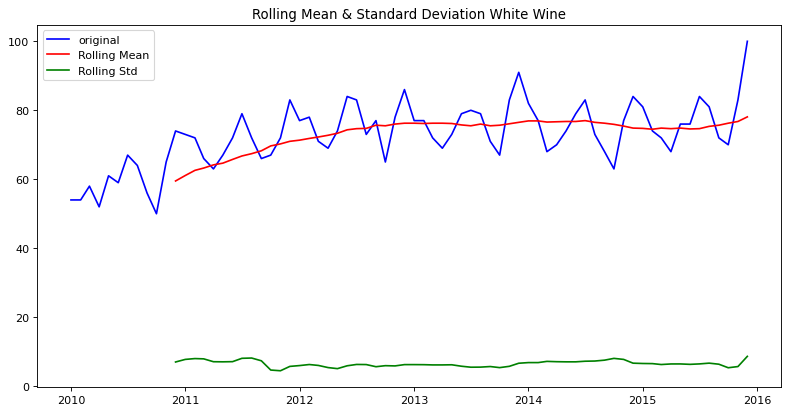

In [23]:
# Plotting the Graph for Rolling Statistics of Whiskey to check if the data is stationary for Whiskey 
figure(figsize=(12,6), dpi=80)
orig =plt.plot(df.WhiteWine_RI, color ='b',label = 'original')
mean =plt.plot(rollmean_ww, color ='r', label = 'Rolling Mean')
mean =plt.plot(rollstd_ww, color ='g', label = 'Rolling Std')
plt.legend(loc="best")
plt.title('Rolling Mean & Standard Deviation White Wine')

In [24]:
#Performing Dicky-Fuller Test in order to check if the data is stationary for White Winw
print('Result of Dickey-Fuller Test White Wine:')
dfoutput_3 = sts.adfuller(df.WhiteWine_RI)
df_WW = pd.Series(dfoutput_3[0:4], index=['Test Statistics','p-value','# Lags used', '# Observation used'])
for key, value in dfoutput_3[4].items():
    df_WW['Critical Value (%s)' %key] = value
print(df_WW)

# The ADF tests gives the following results – test statistic, p-value and the critical value at 1%, 5% , and 10% confidence intervals.
# The p-value is obtained is greater than significance level of 0.05
# There is no reason to reject the null hypothesis. So, the time series is non-stationary.

Result of Dickey-Fuller Test White Wine:
Test Statistics         -1.620020
p-value                  0.472719
# Lags used             12.000000
# Observation used      59.000000
Critical Value (1%)     -3.546395
Critical Value (5%)     -2.911939
Critical Value (10%)    -2.593652
dtype: float64


In [25]:
# Making the data stationary by taking the proportional change
WhiteWine['SeasonalWine_RI'] =  WhiteWine['Relative Interest'] - WhiteWine['Relative Interest'].shift(12)
WhiteWine

,Date,Relative Interest,SeasonalWine_RI
0,2010-01-01,54,NaN
1,2010-02-01,54,NaN
2,2010-03-01,58,NaN
3,2010-04-01,52,NaN
4,2010-05-01,61,NaN
...,...,...,...
67,2015-08-01,81,8.0
68,2015-09-01,72,4.0
69,2015-10-01,70,7.0
70,2015-11-01,83,6.0


In [26]:
#Differencing the data with respect to season in order to make the data stationary

df.Seasonal_WhiteWine_RI =  df.WhiteWine_RI - df.WhiteWine_RI.shift(12)
df.Seasonal_WhiteWine_RI = df.Seasonal_WhiteWine_RI.dropna()
df.Seasonal_WhiteWine_RI 

C:\Users\hemil\AppData\Local\Temp\ipykernel_11980\3173604678.py:3: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.Seasonal_WhiteWine_RI =  df.WhiteWine_RI - df.WhiteWine_RI.shift(12)


Date
2011-01-01    19.0
2011-02-01    18.0
2011-03-01     8.0
2011-04-01    11.0
2011-05-01     6.0
2011-06-01    13.0
2011-07-01    12.0
2011-08-01     8.0
2011-09-01    10.0
2011-10-01    17.0
2011-11-01     7.0
2011-12-01     9.0
2012-01-01     4.0
2012-02-01     6.0
2012-03-01     5.0
2012-04-01     6.0
2012-05-01     7.0
2012-06-01    12.0
2012-07-01     4.0
2012-08-01     1.0
2012-09-01    11.0
2012-10-01    -2.0
2012-11-01     6.0
2012-12-01     3.0
2013-01-01     0.0
2013-02-01    -1.0
2013-03-01     1.0
2013-04-01     0.0
2013-05-01    -1.0
2013-06-01    -5.0
2013-07-01    -3.0
2013-08-01     6.0
2013-09-01    -6.0
2013-10-01     2.0
2013-11-01     5.0
2013-12-01     5.0
2014-01-01     5.0
2014-02-01     0.0
2014-03-01    -4.0
2014-04-01     1.0
2014-05-01     1.0
2014-06-01     0.0
2014-07-01     3.0
2014-08-01    -6.0
2014-09-01    -3.0
2014-10-01    -4.0
2014-11-01    -6.0
2014-12-01    -7.0
2015-01-01    -1.0
2015-02-01    -3.0
2015-03-01     4.0
2015-04-01    -2.0
2015-05

In [27]:
#Performing Dicky-Fuller Test in order to check if the data is stationary for White Wine
print('Result of Dickey-Fuller Test White Wine:')
dfoutput_3_1 = sts.adfuller(df.Seasonal_WhiteWine_RI)
df_WW_1 = pd.Series(dfoutput_3_1[0:4], index=['Test Statistics','p-value','# Lags used', '# Observation used'])
for key, value in dfoutput_3_1[4].items():
    df_WW_1['Critical Value (%s)' %key] = value
print(df_WW_1)

# The ADF tests gives the following results – test statistic, p-value and the critical value at 1%, 5% , and 10% confidence intervals.
# The p-value is obtained is less than significance level of 0.05
# The time-series is now stationary.

Result of Dickey-Fuller Test White Wine:
Test Statistics         -2.884228
p-value                  0.047213
# Lags used              1.000000
# Observation used      58.000000
Critical Value (1%)     -3.548494
Critical Value (5%)     -2.912837
Critical Value (10%)    -2.594129
dtype: float64


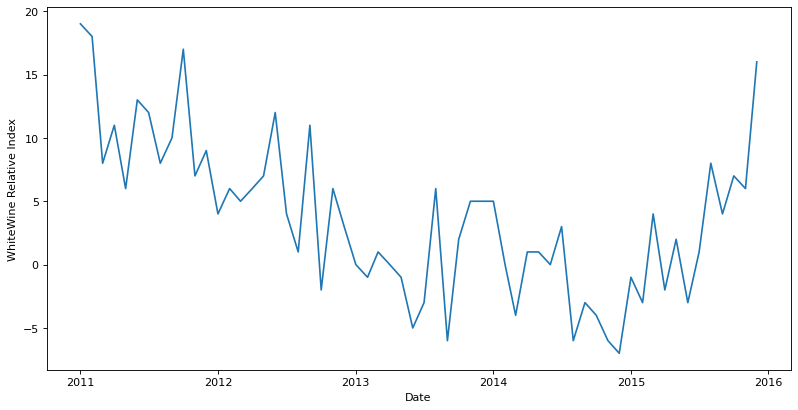

In [28]:
# Plotting for the graph after making time series stationary
figure(figsize=(12,6), dpi=80)
plt.xlabel("Date")
plt.ylabel("WhiteWine Relative Index")
plt.plot(df.Seasonal_WhiteWine_RI)

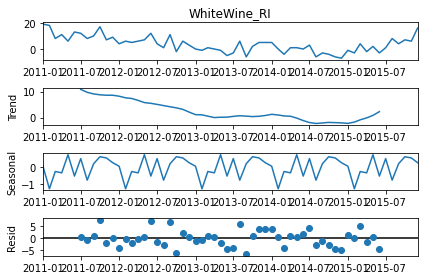

In [29]:
decomposition = sm.tsa.seasonal_decompose(df.Seasonal_WhiteWine_RI, model='additive')
fig = decomposition.plot()

# Craft Beer 

<AxesSubplot:xlabel='Date'>

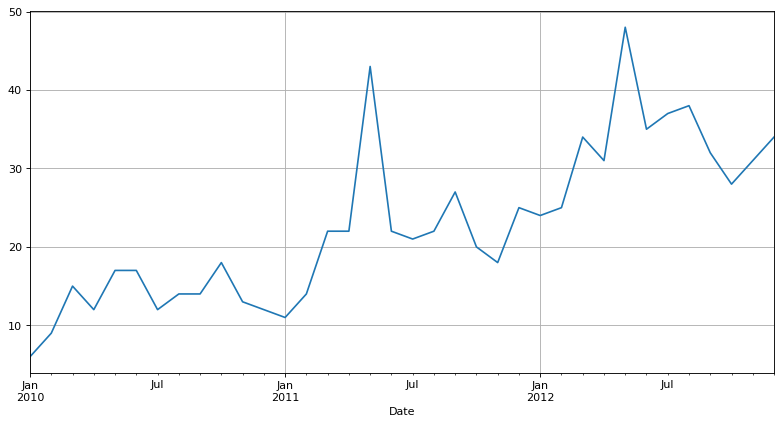

In [30]:
# plotting the graph for Relative Index of Craft Beer over years (Checking the Trend Month on Month)
figure(figsize=(12,6), dpi=80)
start_date = datetime(2010,1,1)
end_date = datetime(2012,12,1)

df.CraftBeer_RI[(start_date <= df.CraftBeer_RI.index) & (df.CraftBeer_RI.index <= end_date)].plot(grid='on')

# The RI of Craft Beer is more from March - May (During Summers).

<AxesSubplot:xlabel='Date'>

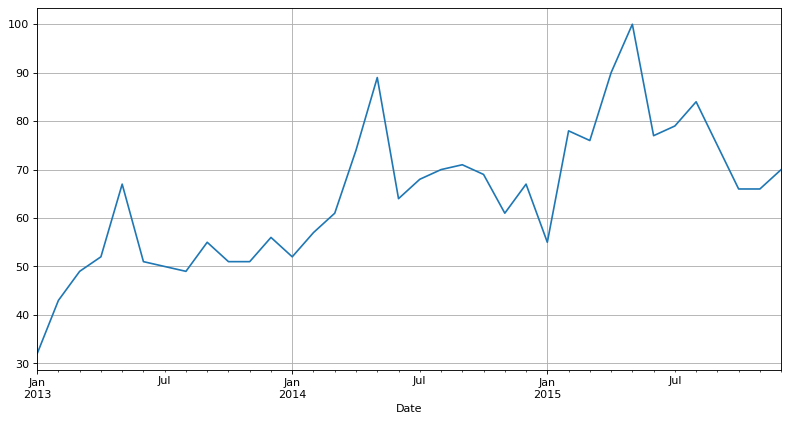

In [31]:
# plotting the graph for Relative Index of Craft Beer over years (Checking the Trend Month on Month)
figure(figsize=(12,6), dpi=80)
start_date = datetime(2013,1,1)
end_date = datetime(2015,12,1)

df.CraftBeer_RI[(start_date <= df.CraftBeer_RI.index) & (df.CraftBeer_RI.index <= end_date)].plot(grid='on')

# The RI of Craft Beer is more from March - May (During Summers).

In [32]:
# Determining Rolling Statistics for CraftBeer
rollmean_cb = df.CraftBeer_RI.rolling(window=12).mean()
rollstd_cb = df.CraftBeer_RI.rolling(window=12).std()
print(rollmean_cb, rollstd_cb)

Date
2010-01-01          NaN
2010-02-01          NaN
2010-03-01          NaN
2010-04-01          NaN
2010-05-01          NaN
                ...    
2015-08-01    75.583333
2015-09-01    75.916667
2015-10-01    75.666667
2015-11-01    76.083333
2015-12-01    76.333333
Name: CraftBeer_RI, Length: 72, dtype: float64 Date
2010-01-01          NaN
2010-02-01          NaN
2010-03-01          NaN
2010-04-01          NaN
2010-05-01          NaN
                ...    
2015-08-01    12.317455
2015-09-01    12.236000
2015-10-01    12.419437
2015-11-01    11.957944
2015-12-01    11.780827
Name: CraftBeer_RI, Length: 72, dtype: float64


Text(0.5, 1.0, 'Rolling Mean & Standard Deviation - CraftBeer')

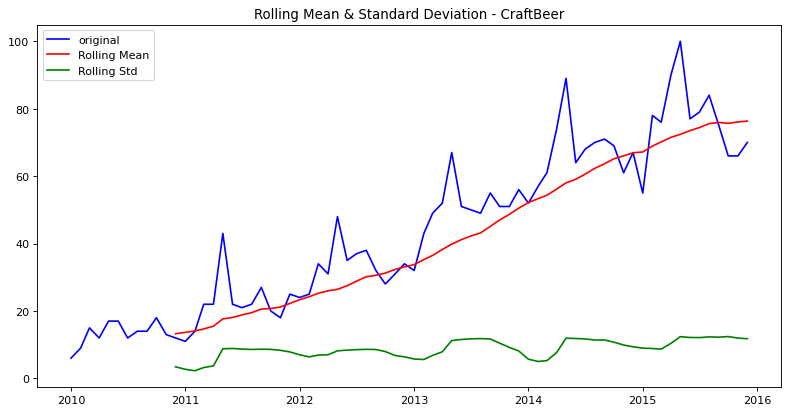

In [33]:
# Plotting the Graph for Rolling Statistics of Craft Beer to check if the data is stationary for Craft Beer 
figure(figsize=(12,6), dpi=80)
orig =plt.plot(df.CraftBeer_RI, color ='b',label = 'original')
mean =plt.plot(rollmean_cb, color ='r', label = 'Rolling Mean')
mean =plt.plot(rollstd_cb, color ='g', label = 'Rolling Std')
plt.legend(loc="best")
plt.title('Rolling Mean & Standard Deviation - CraftBeer')



In [34]:
#Performing Dicky-Fuller Test in order to check if the data is stationary for Craft Beer
print('Result of Dickey-Fuller Test:')
dfoutput_4 = sts.adfuller(df.CraftBeer_RI)
df_C = pd.Series(dfoutput_4[0:4], index=['Test Statistics','p-value','# Lags used', '# Observation used'])
for key, value in dfoutput_4[4].items():
    df_C['Critical Value (%s)' %key] = value
print(df_C)

# The ADF tests gives the following results – test statistic, p-value and the critical value at 1%, 5% , and 10% confidence intervals.
# The p-value is obtained is greater than significance level of 0.05
# There is no reason to reject the null hypothesis. So, the time series is non-stationary.

Result of Dickey-Fuller Test:
Test Statistics         -0.016032
p-value                  0.957186
# Lags used             12.000000
# Observation used      59.000000
Critical Value (1%)     -3.546395
Critical Value (5%)     -2.911939
Critical Value (10%)    -2.593652
dtype: float64


In [35]:
#Applying log function to the data with to make the data stationary
df.CraftBeer_RI = np.log(df.CraftBeer_RI)

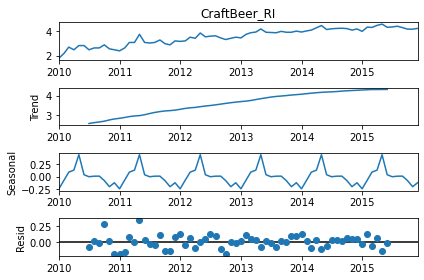

In [36]:
decomposition = sm.tsa.seasonal_decompose(df.CraftBeer_RI, model='additive')
fig = decomposition.plot()

# SARIMA

# Whiskey

In [37]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm

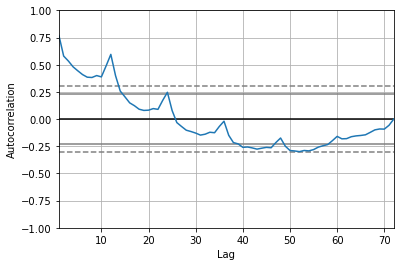

In [38]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df.Whiskey_RI)
plt.show()

C:\Users\hemil\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


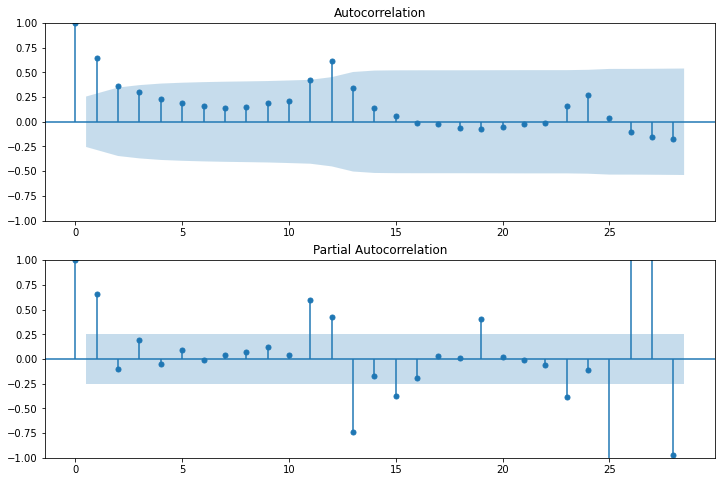

In [39]:
# Plotting Autocorrelation and Partial Autocorrelation plot for Whiskey

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df.Whiskey_RI.iloc[13:],lags=28,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df.Whiskey_RI.iloc[13:],lags=28,ax=ax2)

In [40]:
#Using SARIMAX as we observe some seasonality in the data
Whiskey_model=sm.tsa.statespace.SARIMAX(Whiskey['Relative Interest'],order=(0, 1, 1),seasonal_order=(0,1,1,12))
Whiskey_model_fit=Whiskey_model.fit()

<AxesSubplot:xlabel='Date'>

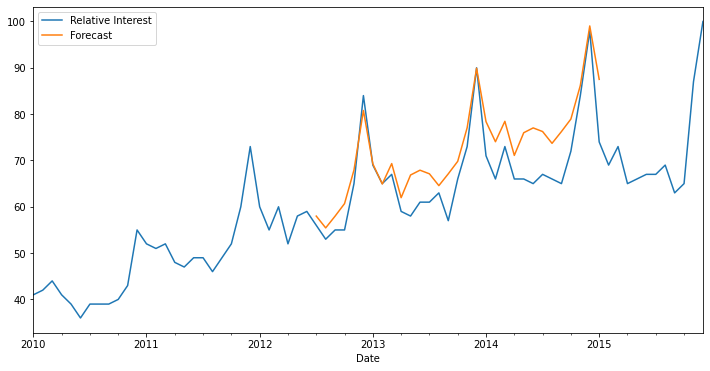

In [41]:
Whiskey["Forecast"]=Whiskey_model_fit.predict(start=30,end=60,dynamic=True)
Whiskey.set_index('Date').plot(figsize=(12,6))

#The result obtained by using model is able to capture seasonality factor but magnitude is not same.

In [42]:
rng = pd.date_range('2016-01-01', periods=24, freq='MS')
future_dates = pd.DataFrame({ 'Date': rng})  
future_dates.index = np.arange(72, 96, 1)
future_dates

,Date
72,2016-01-01
73,2016-02-01
74,2016-03-01
75,2016-04-01
76,2016-05-01
77,2016-06-01
78,2016-07-01
79,2016-08-01
80,2016-09-01
81,2016-10-01


In [43]:
Whiskey_future = Whiskey.append(future_dates)
Whiskey_future.tail()

C:\Users\hemil\AppData\Local\Temp\ipykernel_11980\613937982.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Whiskey_future = Whiskey.append(future_dates)


,Date,Relative Interest,Forecast
91,2017-08-01,NaN,NaN
92,2017-09-01,NaN,NaN
93,2017-10-01,NaN,NaN
94,2017-11-01,NaN,NaN
95,2017-12-01,NaN,NaN


In [44]:
#Visualising Future Values for Whiskey

Whiskey_future["Forecast"]=Whiskey_model_fit.predict(start=50,end=96,dynamic=True)
Whiskey_future.head()

,Date,Relative Interest,Forecast
0,2010-01-01,41.0,NaN
1,2010-02-01,42.0,NaN
2,2010-03-01,44.0,NaN
3,2010-04-01,41.0,NaN
4,2010-05-01,39.0,NaN


Text(0.5, 1.0, 'Whiskey Future Prediction')

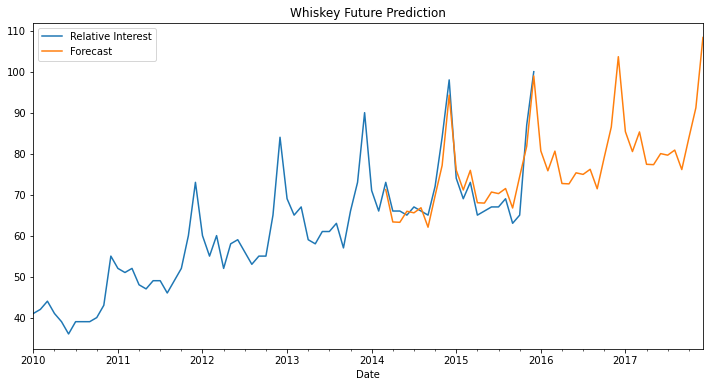

In [45]:
Whiskey_future.set_index('Date').plot(figsize=(12,6))
plt.title('Whiskey Future Prediction')

# White Wine

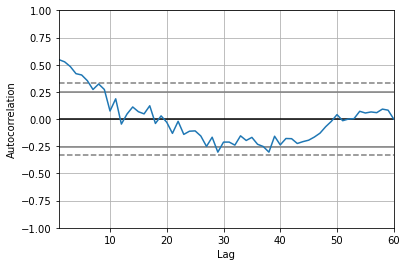

In [46]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df.Seasonal_WhiteWine_RI)
plt.show()

C:\Users\hemil\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


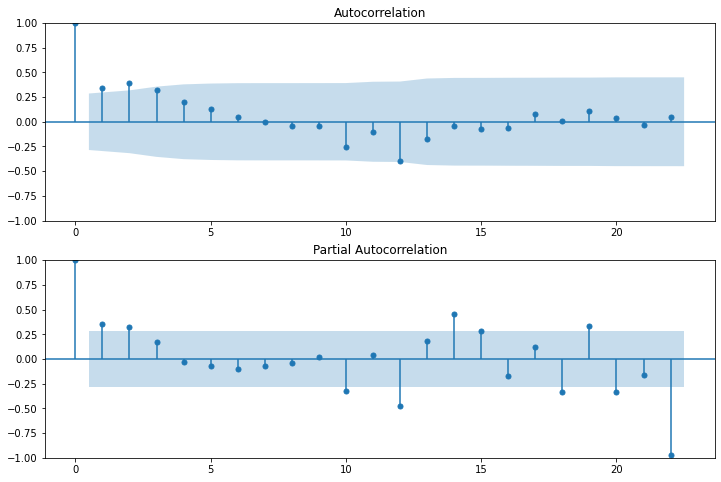

In [47]:
# Plotting Autocorrelation and Partial Autocorrelation plot for White Wine
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df.Seasonal_WhiteWine_RI.iloc[13:],lags=22,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df.Seasonal_WhiteWine_RI.iloc[13:],lags=22,ax=ax2)

# Craft Beer

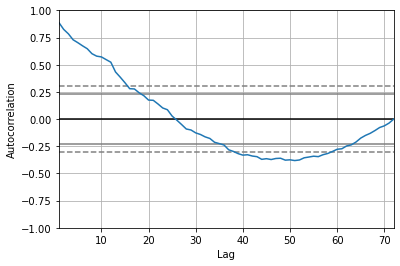

In [48]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df.CraftBeer_RI)
plt.show()

C:\Users\hemil\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


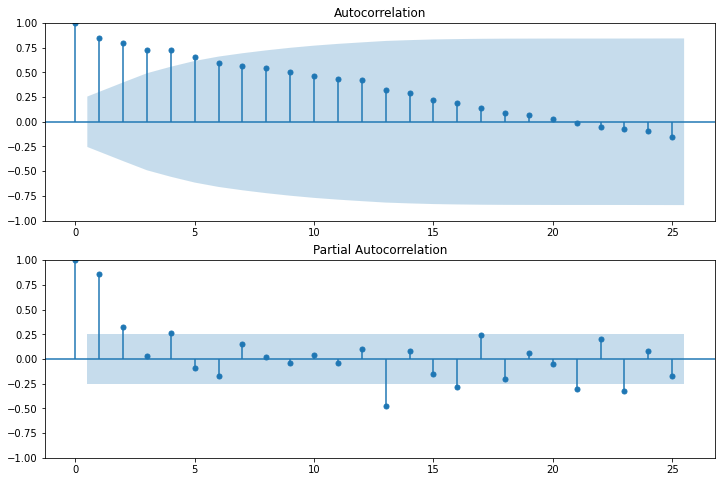

In [49]:
# Plotting Autocorrelation and Partial Autocorrelation plot for Craft Beer
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df.CraftBeer_RI.iloc[13:],lags=25,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df.CraftBeer_RI.iloc[13:],lags=25,ax=ax2)

In [50]:
#We infer that CraftBeer data is Seasonal. SARIMA is performed on this data
CraftBeer_model=sm.tsa.statespace.SARIMAX(CraftBeer['Relative Interest'],order=(0, 1, 1),seasonal_order=(0,1,1,12))
CraftBeer_model_fit=CraftBeer_model.fit()

<AxesSubplot:xlabel='Date'>

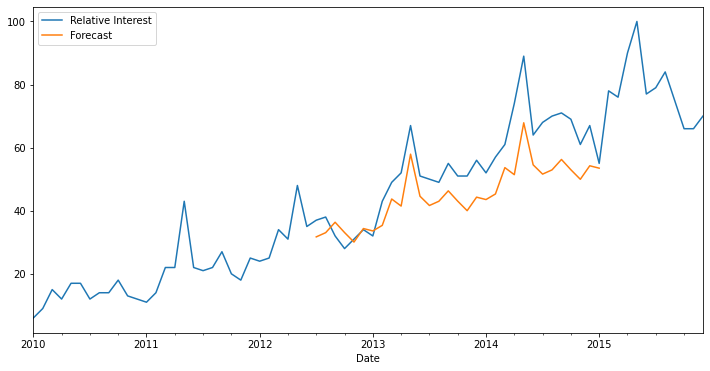

In [51]:
CraftBeer["Forecast"]=CraftBeer_model_fit.predict(start=30,end=60,dynamic=True)
CraftBeer.set_index('Date').plot(figsize=(12,6))

In [52]:
CraftBeer_fut = CraftBeer.append(future_dates)
CraftBeer_fut.tail()

C:\Users\hemil\AppData\Local\Temp\ipykernel_11980\1525953700.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  CraftBeer_fut = CraftBeer.append(future_dates)


,Date,Relative Interest,Forecast
91,2017-08-01,NaN,NaN
92,2017-09-01,NaN,NaN
93,2017-10-01,NaN,NaN
94,2017-11-01,NaN,NaN
95,2017-12-01,NaN,NaN


In [53]:
#Visualising Future Values for CraftBeer

CraftBeer_fut["Forecast"]=CraftBeer_model_fit.predict(start=50,end=96,dynamic=True)
CraftBeer_fut.head()

,Date,Relative Interest,Forecast
0,2010-01-01,6.0,NaN
1,2010-02-01,9.0,NaN
2,2010-03-01,15.0,NaN
3,2010-04-01,12.0,NaN
4,2010-05-01,17.0,NaN


Text(0.5, 1.0, 'Craft Beer Future Prediction')

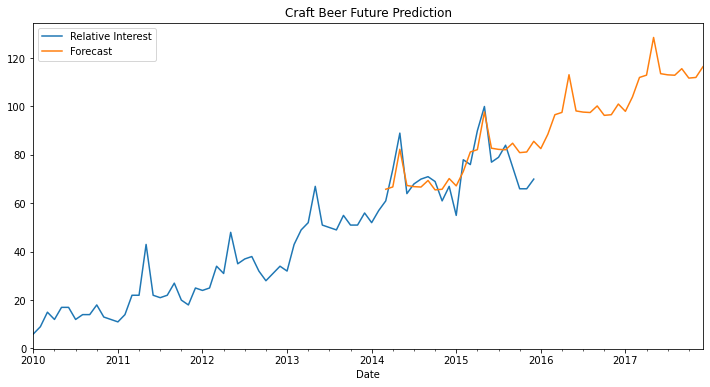

In [54]:
CraftBeer_fut.set_index('Date').plot(figsize=(12,6))
plt.title('Craft Beer Future Prediction')

# FB Prophet

# Whiskey

In [55]:
Whiskey.head()

,Date,Relative Interest,Forecast
0,2010-01-01,41,NaN
1,2010-02-01,42,NaN
2,2010-03-01,44,NaN
3,2010-04-01,41,NaN
4,2010-05-01,39,NaN


In [56]:
from prophet.plot import plot_plotly, plot_components_plotly
from prophet import Prophet

In [57]:
Whiskey = Whiskey.rename(columns={'Date': 'ds','Relative Interest': 'y'})
Whiskey.head()

,ds,y,Forecast
0,2010-01-01,41,NaN
1,2010-02-01,42,NaN
2,2010-03-01,44,NaN
3,2010-04-01,41,NaN
4,2010-05-01,39,NaN


In [58]:
a = Prophet(interval_width=0.95)

In [59]:
a.fit(Whiskey)

14:33:30 - cmdstanpy - INFO - Chain [1] start processing
14:33:30 - cmdstanpy - INFO - Chain [1] done processing


In [60]:
Whiskeyfuture = a.make_future_dataframe(periods=24, freq='MS')
Whiskeyfuture.tail()

,ds
91,2017-08-01
92,2017-09-01
93,2017-10-01
94,2017-11-01
95,2017-12-01


In [61]:
Whiskeyforecast = a.predict(Whiskeyfuture)
Whiskeyforecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2010-01-01,39.051000,37.569196,48.477334,39.051000,39.051000,3.900580,3.900580,3.900580,3.900580,3.900580,3.900580,0.0,0.0,0.0,42.951580
1,2010-02-01,39.752869,34.187216,45.992086,39.752869,39.752869,0.264665,0.264665,0.264665,0.264665,0.264665,0.264665,0.0,0.0,0.0,40.017533
2,2010-03-01,40.386815,37.389561,48.877031,40.386815,40.386815,3.069769,3.069769,3.069769,3.069769,3.069769,3.069769,0.0,0.0,0.0,43.456584
3,2010-04-01,41.088683,31.880931,43.470068,41.088683,41.088683,-3.636953,-3.636953,-3.636953,-3.636953,-3.636953,-3.636953,0.0,0.0,0.0,37.451730
4,2010-05-01,41.767911,31.741036,44.176202,41.767911,41.767911,-3.901317,-3.901317,-3.901317,-3.901317,-3.901317,-3.901317,0.0,0.0,0.0,37.866594
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,2017-08-01,82.294741,70.957383,82.659167,80.865845,83.493807,-5.294746,-5.294746,-5.294746,-5.294746,-5.294746,-5.294746,0.0,0.0,0.0,76.999995
92,2017-09-01,82.635519,69.938174,81.683488,81.074920,83.911120,-6.694820,-6.694820,-6.694820,-6.694820,-6.694820,-6.694820,0.0,0.0,0.0,75.940698
93,2017-10-01,82.965303,73.965508,85.681991,81.330914,84.306458,-3.370377,-3.370377,-3.370377,-3.370377,-3.370377,-3.370377,0.0,0.0,0.0,79.594926
94,2017-11-01,83.306080,81.786579,93.746849,81.549226,84.718999,4.914329,4.914329,4.914329,4.914329,4.914329,4.914329,0.0,0.0,0.0,88.220409


In [62]:
Whiskeyforecast[['ds','yhat']]

,ds,yhat
0,2010-01-01,42.951580
1,2010-02-01,40.017533
2,2010-03-01,43.456584
3,2010-04-01,37.451730
4,2010-05-01,37.866594
...,...,...
91,2017-08-01,76.999995
92,2017-09-01,75.940698
93,2017-10-01,79.594926
94,2017-11-01,88.220409


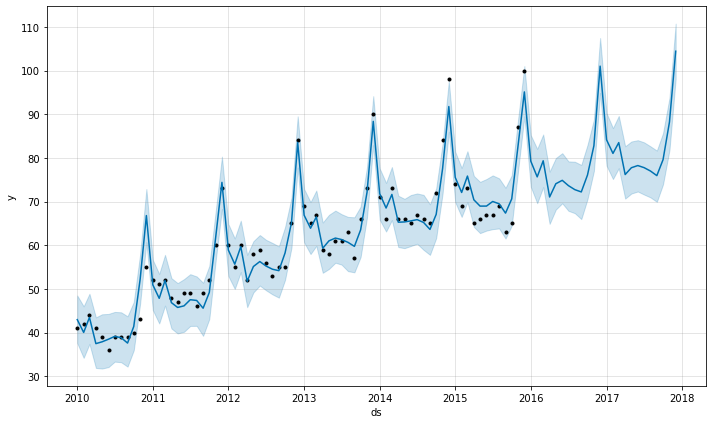

In [63]:
plot1 = a.plot(Whiskeyforecast)

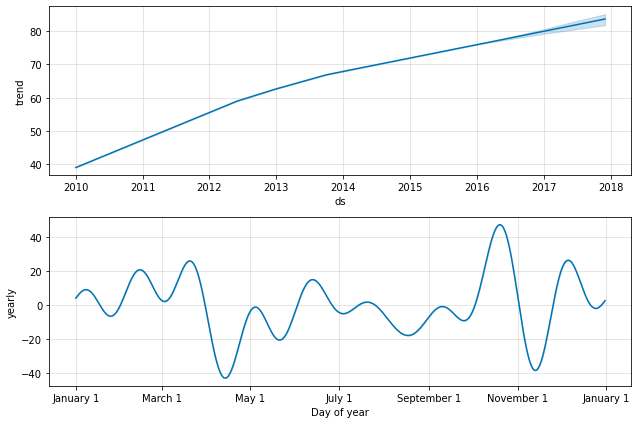

In [64]:
plot2 = a.plot_components(Whiskeyforecast)

# White Wine

In [65]:
WhiteWine = WhiteWine.rename(columns={'Date': 'ds','SeasonalWine_RI': 'y'})
WhiteWine.head()

,ds,Relative Interest,y
0,2010-01-01,54,NaN
1,2010-02-01,54,NaN
2,2010-03-01,58,NaN
3,2010-04-01,52,NaN
4,2010-05-01,61,NaN


In [66]:
b = Prophet(interval_width=0.95)

In [67]:
b.fit(WhiteWine)

14:33:32 - cmdstanpy - INFO - Chain [1] start processing
14:33:32 - cmdstanpy - INFO - Chain [1] done processing


In [68]:
WhiteWinefuture = b.make_future_dataframe(periods=36, freq='MS')
WhiteWinefuture.tail()

,ds
103,2018-08-01
104,2018-09-01
105,2018-10-01
106,2018-11-01
107,2018-12-01


In [69]:
WhiteWineforecast = b.predict(WhiteWinefuture)
WhiteWineforecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2010-01-01,10.988805,3.815323,23.733896,10.988805,10.988805,2.246944,2.246944,2.246944,2.246944,2.246944,2.246944,0.0,0.0,0.0,13.235749
1,2010-02-01,10.788156,1.346783,20.262755,10.788156,10.788156,0.069293,0.069293,0.069293,0.069293,0.069293,0.069293,0.0,0.0,0.0,10.857449
2,2010-03-01,10.606924,0.018101,19.466352,10.606924,10.606924,-0.638853,-0.638853,-0.638853,-0.638853,-0.638853,-0.638853,0.0,0.0,0.0,9.968072
3,2010-04-01,10.406275,1.113574,20.602132,10.406275,10.406275,-0.060505,-0.060505,-0.060505,-0.060505,-0.060505,-0.060505,0.0,0.0,0.0,10.345771
4,2010-05-01,10.212099,0.525683,20.152018,10.212099,10.212099,-0.142379,-0.142379,-0.142379,-0.142379,-0.142379,-0.142379,0.0,0.0,0.0,10.069720
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,2018-08-01,-9.296175,-17.975595,0.513775,-9.296176,-9.296174,0.981962,0.981962,0.981962,0.981962,0.981962,0.981962,0.0,0.0,0.0,-8.314213
104,2018-09-01,-9.496824,-18.231339,0.419555,-9.496825,-9.496823,0.561130,0.561130,0.561130,0.561130,0.561130,0.561130,0.0,0.0,0.0,-8.935694
105,2018-10-01,-9.691001,-16.942799,1.750043,-9.691002,-9.691000,2.355838,2.355838,2.355838,2.355838,2.355838,2.355838,0.0,0.0,0.0,-7.335163
106,2018-11-01,-9.891650,-17.911516,2.076122,-9.891651,-9.891649,1.292597,1.292597,1.292597,1.292597,1.292597,1.292597,0.0,0.0,0.0,-8.599053


In [70]:
WhiteWineforecast[['ds','yhat']]

,ds,yhat
0,2010-01-01,13.235749
1,2010-02-01,10.857449
2,2010-03-01,9.968072
3,2010-04-01,10.345771
4,2010-05-01,10.069720
...,...,...
103,2018-08-01,-8.314213
104,2018-09-01,-8.935694
105,2018-10-01,-7.335163
106,2018-11-01,-8.599053


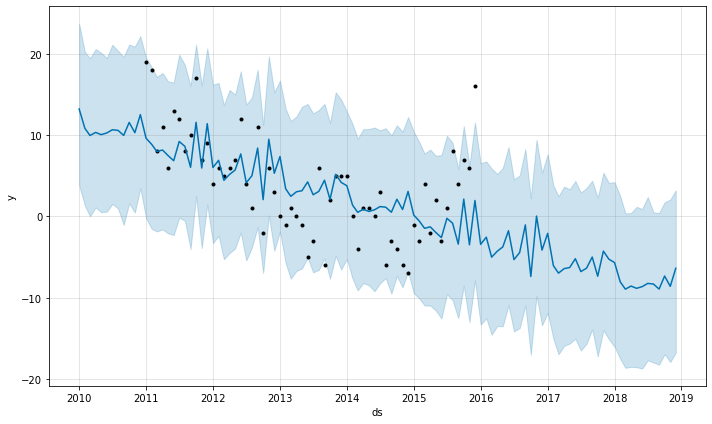

In [71]:
plot1 = b.plot(WhiteWineforecast)

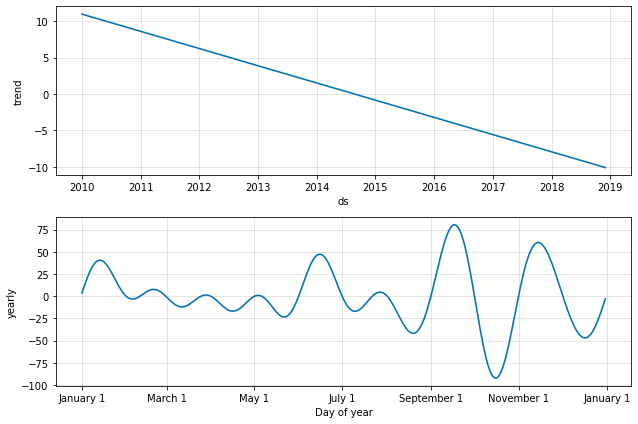

In [72]:
plot2 = b.plot_components(WhiteWineforecast)

# Craft Beer

In [73]:
CraftBeer = CraftBeer.rename(columns={'Date': 'ds','Relative Interest': 'y'})
CraftBeer.head()

,ds,y,Forecast
0,2010-01-01,6,NaN
1,2010-02-01,9,NaN
2,2010-03-01,15,NaN
3,2010-04-01,12,NaN
4,2010-05-01,17,NaN


In [74]:
c = Prophet(interval_width=0.95)

In [75]:
c.fit(CraftBeer)

14:33:34 - cmdstanpy - INFO - Chain [1] start processing
14:33:34 - cmdstanpy - INFO - Chain [1] done processing


In [76]:
CraftBeerfuture = c.make_future_dataframe(periods=24, freq='MS')
CraftBeerfuture.tail()

,ds
91,2017-08-01
92,2017-09-01
93,2017-10-01
94,2017-11-01
95,2017-12-01


In [77]:
Whiskeyfuture = a.make_future_dataframe(periods=24, freq='MS')
Whiskeyfuture.tail()

,ds
91,2017-08-01
92,2017-09-01
93,2017-10-01
94,2017-11-01
95,2017-12-01


In [78]:
CraftBeerforecast = c.predict(CraftBeerfuture)
CraftBeerforecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2010-01-01,5.770430,-10.682544,6.726268,5.770430,5.770430,-7.792301,-7.792301,-7.792301,-7.792301,-7.792301,-7.792301,0.0,0.0,0.0,-2.021871
1,2010-02-01,6.786045,-1.595089,16.070173,6.786045,6.786045,-0.349635,-0.349635,-0.349635,-0.349635,-0.349635,-0.349635,0.0,0.0,0.0,6.436410
2,2010-03-01,7.703374,2.412952,18.960118,7.703374,7.703374,3.098531,3.098531,3.098531,3.098531,3.098531,3.098531,0.0,0.0,0.0,10.801905
3,2010-04-01,8.718988,5.754758,24.502125,8.718988,8.718988,6.435876,6.435876,6.435876,6.435876,6.435876,6.435876,0.0,0.0,0.0,15.154865
4,2010-05-01,9.701841,19.661371,37.033848,9.701841,9.701841,19.082949,19.082949,19.082949,19.082949,19.082949,19.082949,0.0,0.0,0.0,28.784791
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,2017-08-01,106.563592,98.332022,115.830302,105.814216,107.265284,0.760321,0.760321,0.760321,0.760321,0.760321,0.760321,0.0,0.0,0.0,107.323913
92,2017-09-01,107.725837,97.680398,114.545538,106.929861,108.470482,-1.560678,-1.560678,-1.560678,-1.560678,-1.560678,-1.560678,0.0,0.0,0.0,106.165159
93,2017-10-01,108.850591,94.609413,111.095427,107.983525,109.650678,-5.776049,-5.776049,-5.776049,-5.776049,-5.776049,-5.776049,0.0,0.0,0.0,103.074542
94,2017-11-01,110.012836,93.606564,110.930579,109.090907,110.880001,-7.922376,-7.922376,-7.922376,-7.922376,-7.922376,-7.922376,0.0,0.0,0.0,102.090461


In [79]:
CraftBeerforecast[['ds','yhat']]

,ds,yhat
0,2010-01-01,-2.021871
1,2010-02-01,6.436410
2,2010-03-01,10.801905
3,2010-04-01,15.154865
4,2010-05-01,28.784791
...,...,...
91,2017-08-01,107.323913
92,2017-09-01,106.165159
93,2017-10-01,103.074542
94,2017-11-01,102.090461


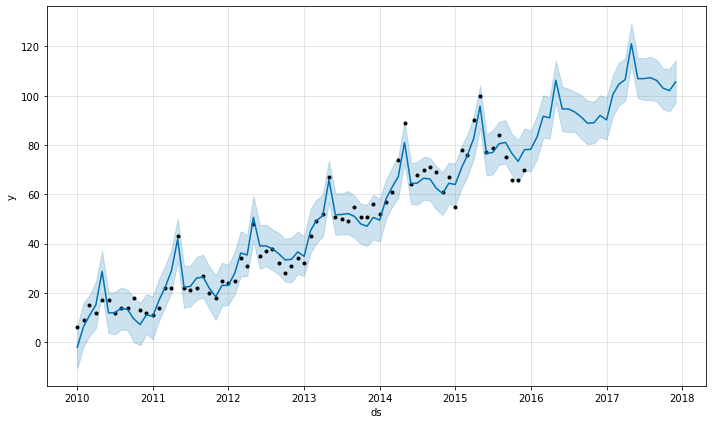

In [80]:
plot1 = c.plot(CraftBeerforecast)

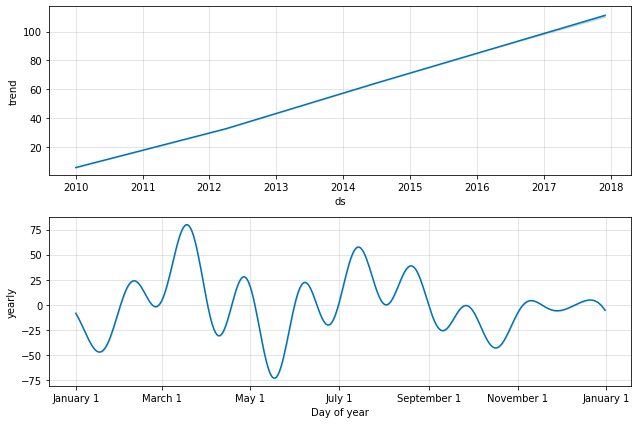

In [81]:
plot2 = c.plot_components(CraftBeerforecast)

# ARIMA

# White Wine

In [82]:
from pmdarima.arima.utils import ndiffs

In [83]:
ndiffs(WhiteWine['Relative Interest'], test="adf")

1

In [84]:
diff = WhiteWine['Relative Interest'].diff().dropna()
diff

1      0.0
2      4.0
3     -6.0
4      9.0
5     -2.0
      ... 
67    -3.0
68    -9.0
69    -2.0
70    13.0
71    17.0
Name: Relative Interest, Length: 71, dtype: float64

C:\Users\hemil\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


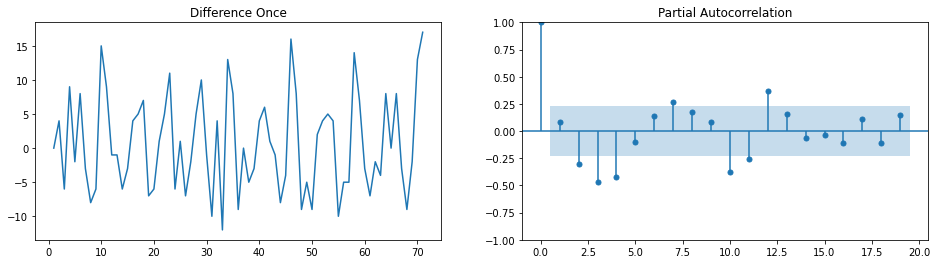

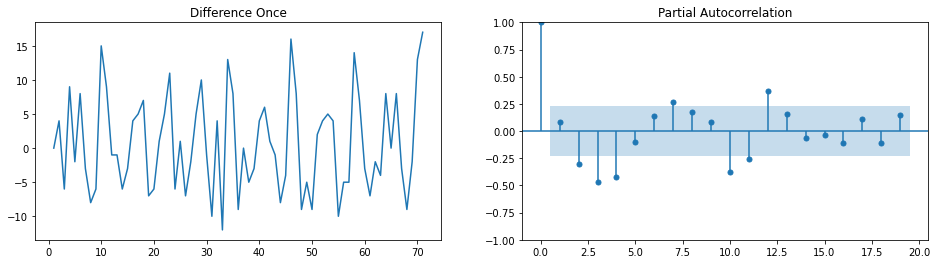

In [85]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16,4))

ax1.plot(diff)
ax1.set_title("Difference Once")
ax2.set_ylim(0,1)
plot_pacf(diff,ax=ax2)

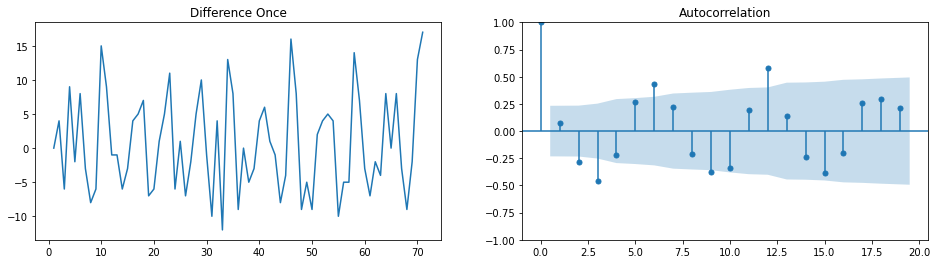

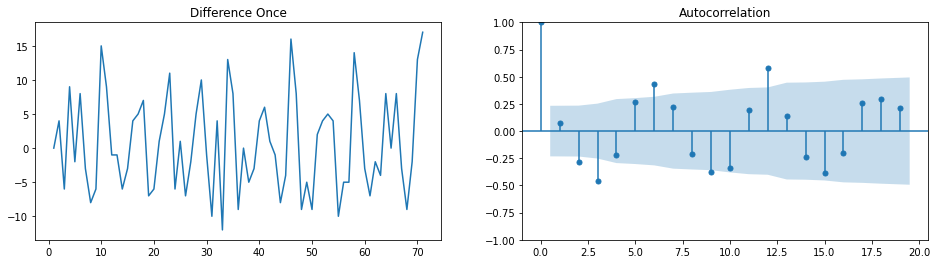

In [86]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16,4))

ax1.plot(diff)
ax1.set_title("Difference Once")
ax2.set_ylim(0,1)
plot_acf(diff,ax=ax2)

In [87]:
from pmdarima import auto_arima

In [88]:
Stepwise_fit = auto_arima(WhiteWine['Relative Interest'], trace=True, suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=442.865, Time=0.16 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=484.907, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=486.445, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=486.022, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=483.487, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=470.544, Time=0.12 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=458.995, Time=0.12 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=436.418, Time=0.34 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=448.874, Time=0.12 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=433.568, Time=0.40 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=444.780, Time=0.17 sec
 ARIMA(5,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.46 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=439.260, Time=0.49 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.42 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=445.877, Time

In [89]:
Stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   72
Model:               SARIMAX(4, 1, 2)   Log Likelihood                -208.784
Date:                Sun, 15 Jan 2023   AIC                            433.568
Time:                        14:33:41   BIC                            451.669
Sample:                             0   HQIC                           440.766
                                 - 72                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.8821      0.508      1.737      0.082      -0.113       1.877
ar.L1          0.4773      0.125      3.833      0.000       0.233       0.721
ar.L2         -0.8019      0.131     -6.144      0.000      -1.058      -0.546
ar.L3         -0.2011      0.130     -1.544      0.123      -0.456       0.054
ar.L4         -0.3141      0.134     -2.338      0.019      -0.577      -0.051
ma.L1         -1.0662      0.115     -9.245      0.000      -1.292      -0.840
ma.L2          0.9681      0.183      5.304      0.000       0.610       1.326
sigma2        18.8829      4.786      3.946      0.000       9.503      28.263
===================================================================================
Ljung-Box (L1) (Q):                   0.08   Jarque-Bera (JB):                 0.64
Prob(Q):                              0.77   Prob(JB):                         0.72
Heteroskedasticity (H):               1.14   Skew:                             0.13
Prob(H) (two-sided):                  0.76   Kurtosis:                         2.61
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [90]:
from statsmodels.tsa.arima.model import ARIMA

In [91]:
print(WhiteWine.shape)
train=WhiteWine.iloc[:-14]
test=WhiteWine.iloc[-14:]
print(train.shape,test.shape)

(72, 3)
(58, 3) (14, 3)


In [92]:
model = ARIMA(train['Relative Interest'], order=(4,1,2))
model=model.fit()
model.summary()

C:\Users\hemil\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:      Relative Interest   No. Observations:                   58
Model:                 ARIMA(4, 1, 2)   Log Likelihood                -166.883
Date:                Sun, 15 Jan 2023   AIC                            347.766
Time:                        14:33:42   BIC                            362.067
Sample:                             0   HQIC                           353.324
                                 - 58                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4249      0.143      2.981      0.003       0.146       0.704
ar.L2         -0.7535      0.134     -5.636      0.000      -1.016      -0.491
ar.L3         -0.2520      0.135     -1.868      0.062      -0.516       0.012
ar.L4         -0.3165      0.143     -2.213      0.027      -0.597      -0.036
ma.L1         -1.0513      0.502     -2.093      0.036      -2.036      -0.067
ma.L2          0.9854      0.887      1.110      0.267      -0.754       2.725
sigma2        17.6728     14.988      1.179      0.238     -11.703      47.048
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):                 0.86
Prob(Q):                              0.84   Prob(JB):                         0.65
Heteroskedasticity (H):               0.61   Skew:                             0.13
Prob(H) (two-sided):                  0.30   Kurtosis:                         2.46
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [93]:
start=len(train)
end=len(train) + len(test)-1
pred_1=model.predict(start=start, end=end,typ='levels')
pred_1.index=WhiteWine.index[start:end+1]
print(pred_1)

58    73.149243
59    78.870375
60    76.496367
61    70.202033
62    64.662818
63    65.839268
64    72.849988
65    78.330174
66    76.833025
67    69.928992
68    64.523942
69    66.072115
70    73.015825
71    78.346597
Name: predicted_mean, dtype: float64


<AxesSubplot:>

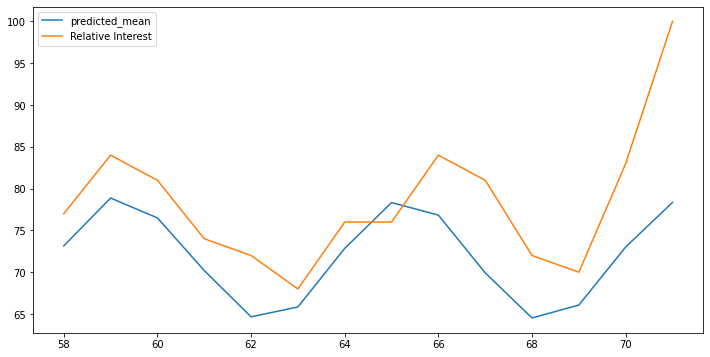

In [94]:
plt.figure(figsize=(12,6))
pred_1.plot(legend=True)
test['Relative Interest'].plot(legend=True)

In [95]:
test['Relative Interest'].mean()

78.42857142857143

In [97]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(pred_1,test['Relative Interest']))
print(rmse)

8.295911338229534


In [98]:
model12=ARIMA(WhiteWine['Relative Interest'], order=(4,1,2))
model12=model12.fit()
WhiteWine.tail()

,ds,Relative Interest,y
67,2015-08-01,81,8.0
68,2015-09-01,72,4.0
69,2015-10-01,70,7.0
70,2015-11-01,83,6.0
71,2015-12-01,100,16.0


In [99]:
WhiteWine1 = WhiteWine.drop('y', axis=1)

In [100]:
WhiteWine1

,ds,Relative Interest
0,2010-01-01,54
1,2010-02-01,54
2,2010-03-01,58
3,2010-04-01,52
4,2010-05-01,61
...,...,...
67,2015-08-01,81
68,2015-09-01,72
69,2015-10-01,70
70,2015-11-01,83


In [101]:
index_future_dates=pd.date_range(start='2015-12-01', end ='2018-12-01', freq='M' )
pred=model12.predict(start=len(WhiteWine),end=len(WhiteWine)+35, type='levels').rename('ARIMA Predictions')
pred.index=index_future_dates

In [102]:
pred

2015-12-31    91.481598
2016-01-31    82.984322
2016-02-29    78.537423
2016-03-31    79.916305
2016-04-30    88.295339
2016-05-31    94.771740
2016-06-30    92.319080
2016-07-31    83.804130
2016-08-31    77.772169
2016-09-30    80.190322
2016-10-31    88.660050
2016-11-30    94.650175
2016-12-31    92.126829
2017-01-31    83.655403
2017-02-28    77.770621
2017-03-31    80.381717
2017-04-30    88.843298
2017-05-31    94.632141
2017-06-30    91.932700
2017-07-31    83.480237
2017-08-31    77.788931
2017-09-30    80.575556
2017-10-31    89.017320
2017-11-30    94.611115
2017-12-31    91.738367
2018-01-31    83.308464
2018-02-28    77.812363
2018-03-31    80.770175
2018-04-30    89.186999
2018-05-31    94.585269
2018-06-30    91.543461
2018-07-31    83.140915
2018-08-31    77.840600
2018-09-30    80.965330
2018-10-31    89.352412
2018-11-30    94.554662
Freq: M, Name: ARIMA Predictions, dtype: float64

<AxesSubplot:>

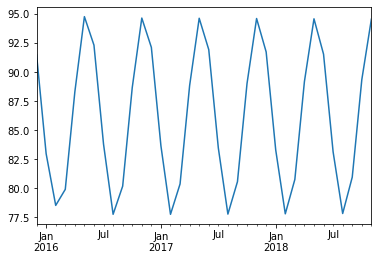

In [103]:
pred.plot()

# Base Line Methods

# Craft Beer

In [104]:
CraftBeer.head()

,ds,y,Forecast
0,2010-01-01,6,NaN
1,2010-02-01,9,NaN
2,2010-03-01,15,NaN
3,2010-04-01,12,NaN
4,2010-05-01,17,NaN


In [105]:
CraftBeer1 = CraftBeer.drop('Forecast', axis=1)

In [106]:
CraftBeer1

,ds,y
0,2010-01-01,6
1,2010-02-01,9
2,2010-03-01,15
3,2010-04-01,12
4,2010-05-01,17
...,...,...
67,2015-08-01,84
68,2015-09-01,75
69,2015-10-01,66
70,2015-11-01,66


In [107]:
import datetime as dt
CraftBeer1_test = CraftBeer1[(CraftBeer1['ds'] >= dt.datetime(2015, 1, 1)) & (CraftBeer1['ds'] <= dt.datetime(2015, 12, 1))]
CraftBeer1_train = CraftBeer1[(CraftBeer1['ds'] >= dt.datetime(2010, 1, 1)) & (CraftBeer1['ds'] <= dt.datetime(2014,12,1))]
CraftBeer1_test = CraftBeer1_test.reset_index(drop = True)
CraftBeer1_train = CraftBeer1_train.reset_index(drop = True)

In [108]:
# Train Baseline
pred = pd.DataFrame(CraftBeer1_test['ds'])
pred = pred.reset_index(drop = True)
h_max = 1*12 + 1
yT = CraftBeer1_train['y'][len(CraftBeer1_train) - 1]
y1 = CraftBeer1_train['y'][0]
T = len(CraftBeer1_train)
m = 1 * 12

In [109]:
# Mean Baseline
pred['Mean Baseline'] = CraftBeer1_train['y'].mean()

In [110]:
# Naive Baseline
pred['Naive Baseline'] = yT

In [111]:
pred_list = []
for h in range(1, h_max): 
  k = math.floor((h - 1)/m)
  index = T + h - m * (k + 1)
  pred_list.append(CraftBeer1['y'][index - 1])
pred['Seasonal Naive Baseline'] = pred_list

In [112]:
pred

,ds,Mean Baseline,Naive Baseline,Seasonal Naive Baseline
0,2015-01-01,37.2,67,52
1,2015-02-01,37.2,67,57
2,2015-03-01,37.2,67,61
3,2015-04-01,37.2,67,74
4,2015-05-01,37.2,67,89
5,2015-06-01,37.2,67,64
6,2015-07-01,37.2,67,68
7,2015-08-01,37.2,67,70
8,2015-09-01,37.2,67,71
9,2015-10-01,37.2,67,69


In [113]:
# Drift Baseline
drift_list = []
for h in range(1, h_max): 
  result = yT + h * ((yT-y1) / T-1)
  drift_list.append(result)
pred['Drift Baseline'] = drift_list

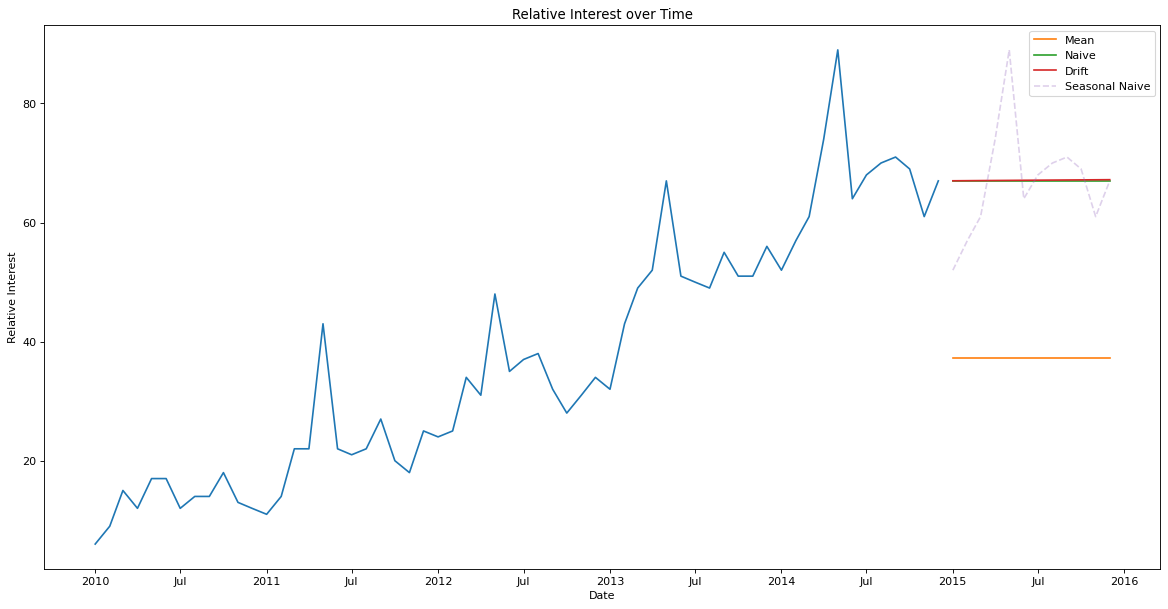

In [114]:
figure(figsize=(18,9), dpi=80)
locator = mdates.AutoDateLocator(minticks = 10, maxticks = 15)
formatter = mdates.ConciseDateFormatter(locator)
plt.gca().xaxis.set_major_locator(locator) 
plt.gca().xaxis.set_major_formatter(formatter)


plt.plot(CraftBeer1_train['ds'], CraftBeer1_train['y'])
plt.plot(pred['ds'], pred['Mean Baseline'], label = 'Mean')
plt.plot(pred['ds'], pred['Naive Baseline'], label = 'Naive')
plt.plot(pred['ds'], pred['Drift Baseline'], label = 'Drift')
plt.plot(pred['ds'], pred['Seasonal Naive Baseline'], label = 'Seasonal Naive', linestyle = '--', alpha = 0.3)
plt.xlabel('Date')
plt.ylabel('Relative Interest')
plt.title('Relative Interest over Time')
plt.legend()
plt.show()

# Whiskey

In [115]:
Whiskey.head()

,ds,y,Forecast
0,2010-01-01,41,NaN
1,2010-02-01,42,NaN
2,2010-03-01,44,NaN
3,2010-04-01,41,NaN
4,2010-05-01,39,NaN


In [116]:
Whiskey1 = Whiskey.drop('Forecast', axis=1)

In [117]:
Whiskey1_test = Whiskey1[(Whiskey1['ds'] >= dt.datetime(2015, 1, 1)) & (Whiskey1['ds'] <= dt.datetime(2015, 12, 1))]
Whiskey1_train = Whiskey1[(Whiskey1['ds'] >= dt.datetime(2010, 1, 1)) & (Whiskey1['ds'] <= dt.datetime(2014,12,1))]
Whiskey1_test = Whiskey1_test.reset_index(drop = True)
Whiskey1_train = Whiskey1_train.reset_index(drop = True)

In [118]:
# Train Baseline
pred = pd.DataFrame(Whiskey1_test['ds'])
pred = pred.reset_index(drop = True)
h_max = 1*12 + 1
yT = Whiskey1_train['y'][len(CraftBeer1_train) - 1]
y1 = Whiskey1_train['y'][0]
T = len(Whiskey1_train)
m = 1 * 12

In [119]:
# Mean Baseline
pred['Mean Baseline'] = Whiskey1_train['y'].mean()

In [120]:
# Naive Baseline
pred['Naive Baseline'] = yT

In [121]:
pred_list = []
for h in range(1, h_max): 
  k = math.floor((h - 1)/m)
  index = T + h - m * (k + 1)
  pred_list.append(Whiskey1['y'][index - 1])
pred['Seasonal Naive Baseline'] = pred_list

In [122]:
# Drift Baseline
drift_list = []
for h in range(1, h_max): 
  result = yT + h * ((yT-y1) / T-1)
  drift_list.append(result)
pred['Drift Baseline'] = drift_list

In [123]:
pred

,ds,Mean Baseline,Naive Baseline,Seasonal Naive Baseline,Drift Baseline
0,2015-01-01,58.1,98,71,97.95
1,2015-02-01,58.1,98,66,97.90
2,2015-03-01,58.1,98,73,97.85
3,2015-04-01,58.1,98,66,97.80
4,2015-05-01,58.1,98,66,97.75
5,2015-06-01,58.1,98,65,97.70
6,2015-07-01,58.1,98,67,97.65
7,2015-08-01,58.1,98,66,97.60
8,2015-09-01,58.1,98,65,97.55
9,2015-10-01,58.1,98,72,97.50


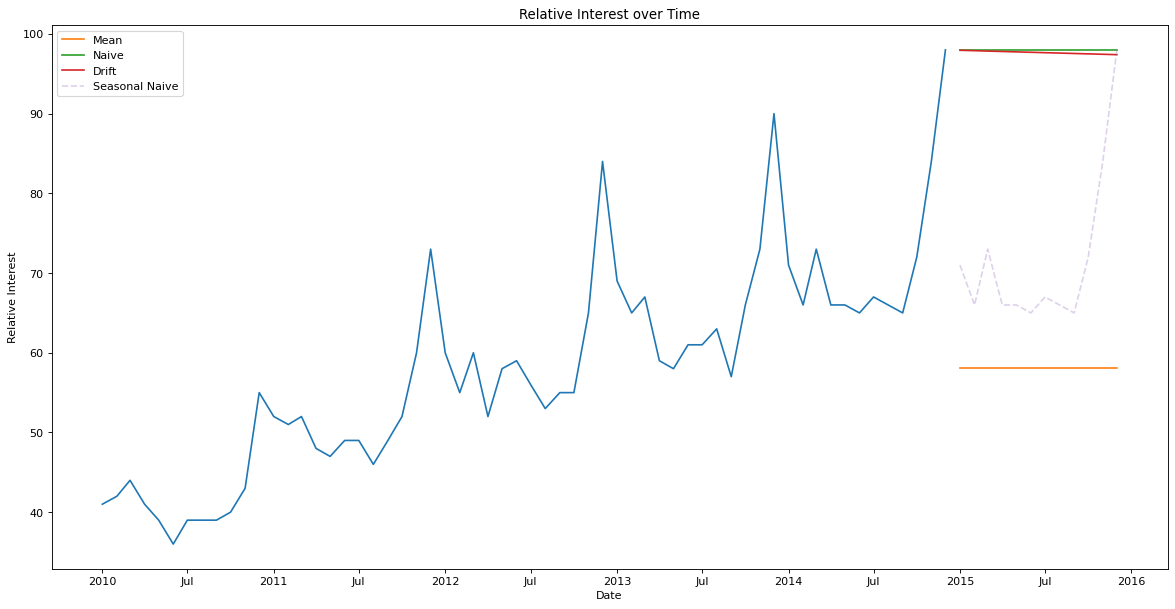

In [124]:
figure(figsize=(18,9), dpi=80)
locator = mdates.AutoDateLocator(minticks = 10, maxticks = 15)
formatter = mdates.ConciseDateFormatter(locator)
plt.gca().xaxis.set_major_locator(locator) 
plt.gca().xaxis.set_major_formatter(formatter)


plt.plot(Whiskey1_train['ds'], Whiskey1_train['y'])
plt.plot(pred['ds'], pred['Mean Baseline'], label = 'Mean')
plt.plot(pred['ds'], pred['Naive Baseline'], label = 'Naive')
plt.plot(pred['ds'], pred['Drift Baseline'], label = 'Drift')
plt.plot(pred['ds'], pred['Seasonal Naive Baseline'], label = 'Seasonal Naive', linestyle = '--', alpha = 0.3)
plt.xlabel('Date')
plt.ylabel('Relative Interest')
plt.title('Relative Interest over Time')
plt.legend()
plt.show()

# White Wine

In [125]:
WhiteWine1.head()

,ds,Relative Interest
0,2010-01-01,54
1,2010-02-01,54
2,2010-03-01,58
3,2010-04-01,52
4,2010-05-01,61


In [126]:
WhiteWine1_test = WhiteWine1[(WhiteWine1['ds'] >= dt.datetime(2015, 1, 1)) & (WhiteWine1['ds'] <= dt.datetime(2015, 12, 1))]
WhiteWine1_train = WhiteWine1[(Whiskey1['ds'] >= dt.datetime(2010, 1, 1)) & (WhiteWine1['ds'] <= dt.datetime(2014,12,1))]
WhiteWine1_test = WhiteWine1_test.reset_index(drop = True)
WhiteWine1_train = WhiteWine1_train.reset_index(drop = True)

In [127]:
# Train Baseline
pred = pd.DataFrame(Whiskey1_test['ds'])
pred = pred.reset_index(drop = True)
h_max = 1*12 + 1
yT = WhiteWine1_train['Relative Interest'][len(CraftBeer1_train) - 1]
y1 = WhiteWine1_train['Relative Interest'][0]
T = len(WhiteWine1_train)
m = 1 * 12

In [128]:
# Mean Baseline
pred['Mean Baseline'] = WhiteWine1_train['Relative Interest'].mean()

In [129]:
# Naive Baseline
pred['Naive Baseline'] = yT

In [130]:
pred_list = []
for h in range(1, h_max): 
  k = math.floor((h - 1)/m)
  index = T + h - m * (k + 1)
  pred_list.append(WhiteWine1['Relative Interest'][index - 1])
pred['Seasonal Naive Baseline'] = pred_list

In [131]:
# Drift Baseline
drift_list = []
for h in range(1, h_max): 
  result = yT + h * ((yT-y1) / T-1)
  drift_list.append(result)
pred['Drift Baseline'] = drift_list

In [132]:
pred

,ds,Mean Baseline,Naive Baseline,Seasonal Naive Baseline,Drift Baseline
0,2015-01-01,71.616667,84,82,83.5
1,2015-02-01,71.616667,84,77,83.0
2,2015-03-01,71.616667,84,68,82.5
3,2015-04-01,71.616667,84,70,82.0
4,2015-05-01,71.616667,84,74,81.5
5,2015-06-01,71.616667,84,79,81.0
6,2015-07-01,71.616667,84,83,80.5
7,2015-08-01,71.616667,84,73,80.0
8,2015-09-01,71.616667,84,68,79.5
9,2015-10-01,71.616667,84,63,79.0


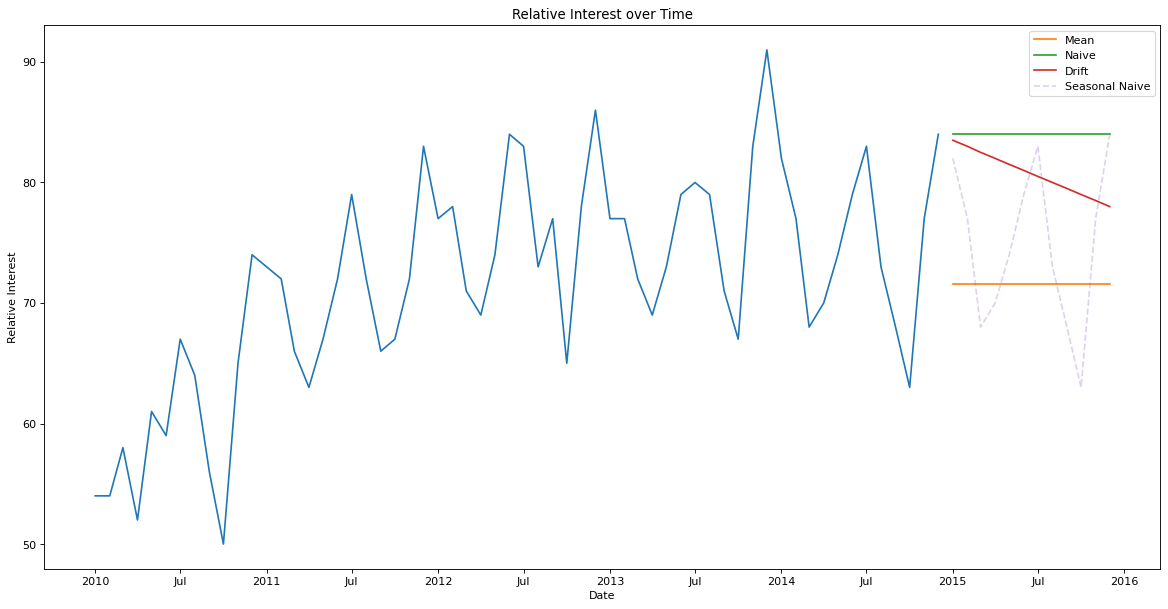

In [133]:
figure(figsize=(18,9), dpi=80)
locator = mdates.AutoDateLocator(minticks = 10, maxticks = 15)
formatter = mdates.ConciseDateFormatter(locator)
plt.gca().xaxis.set_major_locator(locator) 
plt.gca().xaxis.set_major_formatter(formatter)


plt.plot(WhiteWine1_train['ds'], WhiteWine1_train['Relative Interest'])
plt.plot(pred['ds'], pred['Mean Baseline'], label = 'Mean')
plt.plot(pred['ds'], pred['Naive Baseline'], label = 'Naive')
plt.plot(pred['ds'], pred['Drift Baseline'], label = 'Drift')
plt.plot(pred['ds'], pred['Seasonal Naive Baseline'], label = 'Seasonal Naive', linestyle = '--', alpha = 0.3)
plt.xlabel('Date')
plt.ylabel('Relative Interest')
plt.title('Relative Interest over Time')
plt.legend()
plt.show()